In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from typing import List
#import h2o
#import H2OAutoML

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


#h2o.init(nthreads = 4)




def separate_activity_data(id: int, activity_data: pd.DataFrame, activity_progress_data: pd.DataFrame) -> dict:
    activity_progress = {}
    matching_activities = activity_data[activity_data['_id'] == id]
    if not matching_activities.empty:
        activity = matching_activities.iloc[0]
        activity_progress = {
            'id': activity['_id'],
            'projectId': activity['projectId'],
            'name': activity['name'],
            'bidQuantity': activity['bidQuantity'],
            'measurementDate': get_measurement_dates_by_id(activity['_id'], activity_data, activity_progress_data),
            'progressQuantity': get_progress_quantity(activity['_id'], activity_data, activity_progress_data)
        }
    return activity_progress

def get_measurement_dates_by_id(id: int, activity_data: pd.DataFrame, activity_progress_data: pd.DataFrame) -> List[str]:
    matching_activities = activity_data[activity_data['_id'] == id]
    measurement_dates = []
    for _, activity in matching_activities.iterrows():
        matching_progress = activity_progress_data[(activity_progress_data['activityId'] == id) & activity_progress_data['measurementDate'].notna()]
        if not matching_progress.empty:
            measurement_dates.extend(matching_progress['measurementDate'].tolist())
    return measurement_dates

def get_progress_quantity(id: int, activity_data: pd.DataFrame, activity_progress_data: pd.DataFrame) -> List[int]:
    matching_activities = activity_data[activity_data['_id'] == id]
    progress_quantity = []
    for _, activity in matching_activities.iterrows():
        matching_progress = activity_progress_data[(activity_progress_data['activityId'] == id) & activity_progress_data['progressQuantity'].notna()]
        if not matching_progress.empty:
            progress_quantity.extend(matching_progress['progressQuantity'].tolist())
    return progress_quantity

# Example usage
activityData = pd.read_csv('/kaggle/input/activs/Innovation Day Data - Fake Activity Data.csv')
activityProgressData = pd.read_csv('/kaggle/input/activs/Innovation Day Data - Fake Progress Data.csv')
all_activity_progresses = []
for activity_id in activityData['_id'].unique():
    activity_progress = separate_activity_data(activity_id, activityData, activityProgressData)
    all_activity_progresses.append(activity_progress)

print(all_activity_progresses)
pd.DataFrame(all_activity_progresses).to_csv('/kaggle/working/output.csv')
pd.DataFrame(all_activity_progresses).to_json('/kaggle/working/outputjson.csv')


/kaggle/input/activs/Innovation Day Data - Fake Activity Data.csv
/kaggle/input/activs/Innovation Day Data - Fake Progress Data.csv
/kaggle/input/madeup/made up.txt
/kaggle/input/firstepochs/firstlot.txt
[{'id': 1, 'projectId': 'Project Incomplete', 'name': 'Linear 1', 'bidQuantity': 50000.0, 'measurementDate': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10'], 'progressQuantity': [500.0, 1000.0, 1500.0, 2000.0, 2500.0, 3000.0, 3500.0, 4000.0, 4500.0, 5000.0]}, {'id': 2, 'projectId': 'Project Complete', 'name': 'Random 1', 'bidQuantity': 76543.0, 'measurementDate': ['2023-02-01', '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-17', '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22', '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05'], 'progressQuantity': [66.78046822, 92.50491148, 94.17265

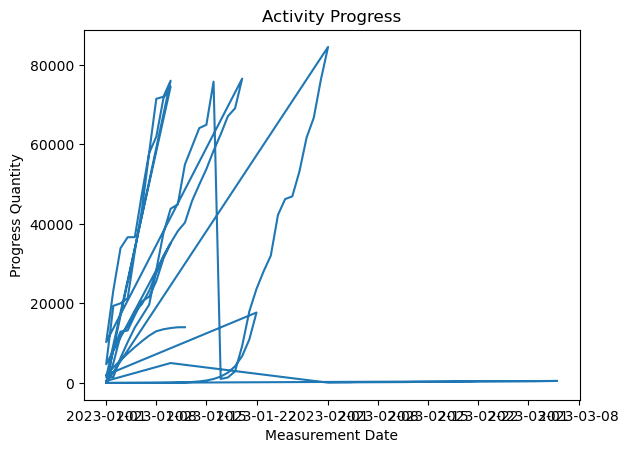

In [22]:
import matplotlib.pyplot as plt

# Extract measurement dates and progress quantities
measurement_dates = []
progress_quantities = []
bidQuantity = []

for activity_progress in all_activity_progresses:
    measurement_dates.extend(activity_progress['measurementDate'])
    progress_quantities.extend(activity_progress['progressQuantity'])
    

# Convert measurement dates to datetime objects
measurement_dates = [pd.to_datetime(date) for date in measurement_dates]

# Plot the line graph
plt.plot(measurement_dates, progress_quantities)
plt.xlabel('Measurement Date')
plt.ylabel('Progress Quantity')
plt.title('Activity Progress')

plt.show()

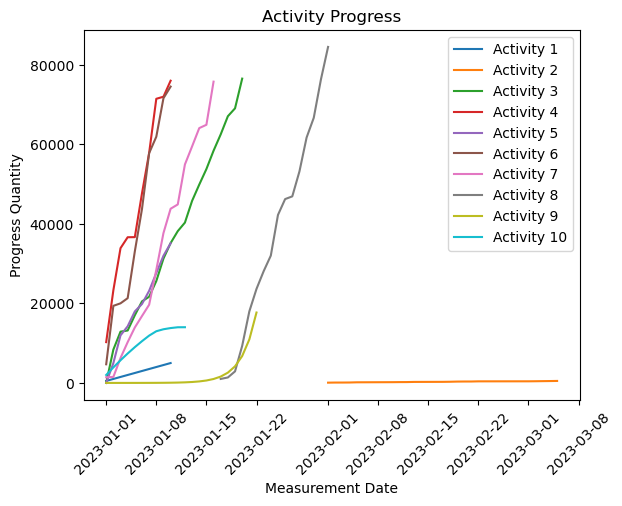

In [23]:


for activity_progress in all_activity_progresses:
    # Extract activity information
    activity_id = activity_progress['id']
    measurement_dates = activity_progress['measurementDate']
    progress_quantities = activity_progress['progressQuantity']

    # Convert measurement dates to datetime objects
    measurement_dates = [pd.to_datetime(date) for date in measurement_dates]

    # Plot the line graph for the current activity
    plt.plot(measurement_dates, progress_quantities, label=f'Activity {activity_id}')

plt.xlabel('Measurement Date')
plt.ylabel('Progress Quantity')
plt.title('Activity Progress')
plt.xticks(rotation=45)
plt.legend()
plt.show()

once imported we can export a csv just to ensure some data is in a format I happen to know but should be able to use the dataframe as is

In [3]:
h2o.init()
#dataset = h2o.import_file('/kaggle/working/output.csv')
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")



Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpnphkmbe9
  JVM stdout: /tmp/tmpnphkmbe9/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpnphkmbe9/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_vpa4ds
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.500 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
print(train)

  response        x1         x2           x3        x4         x5        x6          x7          x8       x9       x10        x11        x12      x13       x14         x15        x16      x17       x18         x19          x20      x21       x22       x23       x24       x25       x26       x27       x28
         1  0.869293  -0.635082   0.22569     0.32747   -0.689993  0.754202  -0.248573   -1.09206    0        1.37499   -0.653674   0.930349  1.10744  1.1389    -1.5782     -1.04699   0        0.65793   -0.0104546  -0.0457672   3.10196  1.35376   0.979563  0.978076  0.920005  0.721657  0.988751  0.876678
         1  0.907542   0.329147   0.359412    1.49797   -0.31301   1.09553   -0.557525   -1.58823    2.17308  0.812581  -0.213642   1.27101   2.21487  0.499994  -1.26143     0.732156  0        0.398701  -1.13893    -0.00081911  0        0.30222   0.833048  0.9857    0.978098  0.779732  0.992356  0.798343
         1  0.798835   1.47064   -1.63597     0.453773   0.425629  1.10487    1.28

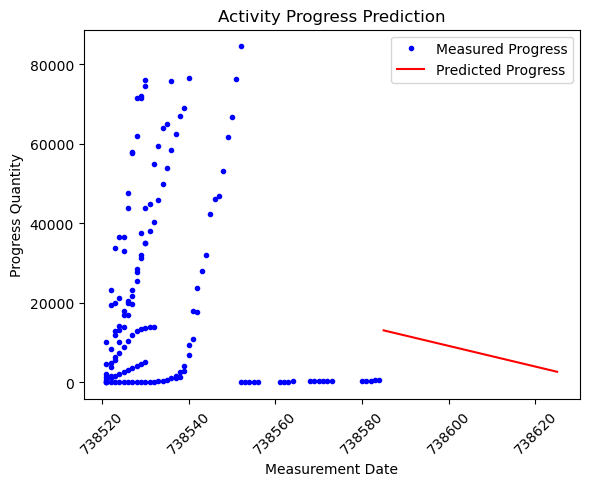

In [28]:

from sklearn.linear_model import LinearRegression

# Prepare the Data
measurement_dates = []
progress_quantities = []

for activity_progress in all_activity_progresses:
    measurement_dates.extend(activity_progress['measurementDate'])
    progress_quantities.extend(activity_progress['progressQuantity'])

measurement_dates = [pd.to_datetime(date).toordinal() for date in measurement_dates]
progress_quantities = np.array(progress_quantities)

# Convert to numpy arrays and reshape for linear regression
X = np.array(measurement_dates).reshape(-1, 1)
y = progress_quantities.reshape(-1, 1)

# Split the Data
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Choose a Regression Model (Linear Regression)
regression_model = LinearRegression()

# Train the Model
regression_model.fit(X_train, y_train)

# Make Predictions for Future Dates
future_dates = pd.date_range(start='2023-03-06', end='2023-04-15')
future_dates_ord = [date.toordinal() for date in future_dates]
X_future = np.array(future_dates_ord).reshape(-1, 1)
y_pred = regression_model.predict(X_future)

# Convert future dates back to datetime objects
future_dates = [pd.to_datetime(date_ord) for date_ord in future_dates_ord]

# Visualize the Predictions
plt.plot(X, y, 'b.', label='Measured Progress')
plt.plot(X_future, y_pred, 'r-', label='Predicted Progress')
plt.xlabel('Measurement Date')
plt.ylabel('Progress Quantity')
plt.title('Activity Progress Prediction')
plt.xticks(rotation=45)
plt.legend()
plt.show()

sketchy 

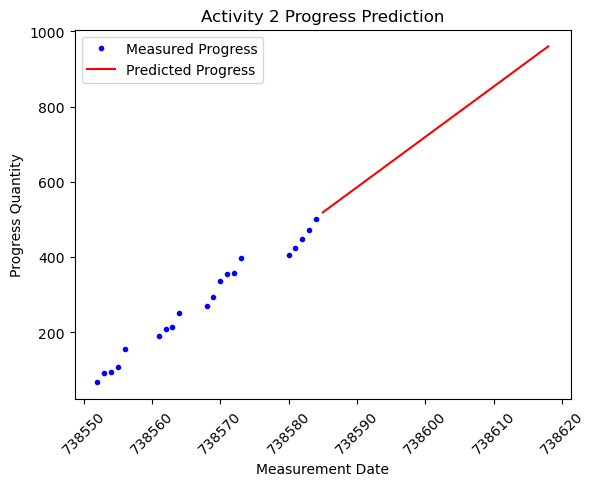

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Select one activity to train and predict
activity_index = 1
activity_progress = all_activity_progresses[activity_index]

# Prepare the Data for the selected activity
measurement_dates = activity_progress['measurementDate']
progress_quantities = activity_progress['progressQuantity']

measurement_dates = [pd.to_datetime(date).toordinal() for date in measurement_dates]
progress_quantities = np.array(progress_quantities)

# Convert to numpy arrays and reshape for linear regression
X = np.array(measurement_dates).reshape(-1, 1)
y = progress_quantities.reshape(-1, 1)

# Split the Data
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Choose a Regression Model (Linear Regression)
regression_model = LinearRegression()

# Train the Model
regression_model.fit(X_train, y_train)

# Make Predictions for Future Dates
future_dates = pd.date_range(start='2023-03-06', end='2023-04-08')
future_dates_ord = [date.toordinal() for date in future_dates]
X_future = np.array(future_dates_ord).reshape(-1, 1)
y_pred = regression_model.predict(X_future)

# Convert future dates back to datetime objects
future_dates = [pd.to_datetime(date_ord) for date_ord in future_dates_ord]

# Visualize the Predictions
plt.plot(X, y, 'b.', label='Measured Progress')
plt.plot(X_future, y_pred, 'r-', label='Predicted Progress')
plt.xlabel('Measurement Date')
plt.ylabel('Progress Quantity')
plt.title(f'Activity {activity_index + 1} Progress Prediction')
plt.xticks(rotation=45)
plt.legend()
plt.show()
